In [ ]:
import numpy as np
import trace_gen as tg # source code at: https://github.com/Effygal/trace-gen
import matplotlib.pyplot as plt
import heapq
import seaborn as sns
import matplotlib.ticker as ticker
plt.rcParams['pdf.fonttype'] = 42 
plt.rcParams['ps.fonttype'] = 42 
plt.rcParams['image.cmap'] = 'viridis'
plt.rcParams['text.usetex']  = False
palette = sns.color_palette("deep")

In [2]:
def gen_from_zipf(M, n, a):
    ranks = np.arange(1, M+1)
    p = ranks**(-a)
    p /= p.sum()
    return p, np.random.choice(M, size=n, p=p)

def gen_from_iad(f, M, n):
    # f(): returns a positive integer IAD sample
    h = [(f(), i) for i in range(M)]
    heapq.heapify(h)
    trace = []
    for _ in range(n):
        t, addr = heapq.heappop(h)
        trace.append(addr)
        heapq.heappush(h, (t + f(), addr))
    return np.array(trace, dtype=np.int32)

In [3]:
lmb, trace1 = gen_from_zipf(10000, 1000000, 0.65)
iads1 = tg.iad(trace1)
f = lambda: int(np.random.choice(iads1))
trace2 = gen_from_iad(f, 10000, 1000000)

In [4]:

# Residence and reference age anaysis
clock = tg.clock(4000)
c_ref1, c_enter1, _ = clock.run_age(trace1)
c_ref2, c_enter2, _ = clock.run_age(trace2)

rclock = tg.ran_clock(4000)
rc_ref1, rc_enter1, _ = rclock.run_age(trace1, rp=True)
rc_ref2, rc_enter2, _ = rclock.run_age(trace2, rp=True)

rclock2 = tg.ran_clock(4000)
rc_ref1_no_rp, rc_enter1_no_rp, _ = rclock2.run_age(trace1, rp=False)
rc_ref2_no_rp, rc_enter2_no_rp, _ = rclock2.run_age(trace2, rp=False)

from trace_gen.lru_wrapper import lru as LRU 
lru = LRU(4000)
lru_ref1, lru_enter1, _ = lru.run_age(trace1)
lru_ref2, lru_enter2, _ = lru.run_age(trace2)   

fifo = tg.fifo(4000)
fifo_enter1, _ = fifo.run_age(trace1)
fifo_enter2, _ = fifo.run_age(trace2)

sieve = tg.sieve(4000)
sieve_ref1, sieve_enter1, _ = sieve.run_age(trace1)
sieve_ref2, sieve_enter2, _ = sieve.run_age(trace2)

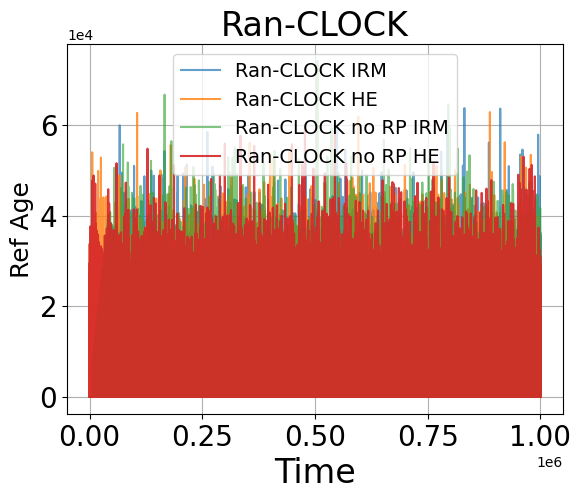

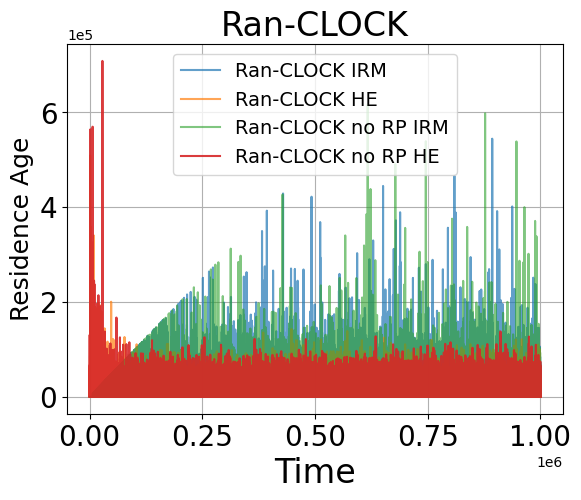

In [5]:
plt.plot(rc_ref1, alpha=0.7, label='Ran-CLOCK IRM')
plt.plot(rc_ref2, alpha=0.8, label='Ran-CLOCK HE')
plt.plot(rc_ref1_no_rp, alpha=0.6, label='Ran-CLOCK no RP IRM')
plt.plot(rc_ref2_no_rp, alpha=0.9, label='Ran-CLOCK no RP HE')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(True)
ax.xaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(True)
ax.yaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.tick_params(axis='both', labelsize=20)
plt.xlabel('Time', fontsize=24)
plt.ylabel('Ref Age', fontsize=18)
plt.legend(fontsize=14)
plt.title('Ran-CLOCK', fontsize=24)
plt.grid(True)
plt.show()
plt.plot(rc_enter1, alpha=0.7, label='Ran-CLOCK IRM')
plt.plot(rc_enter2, alpha=0.7, label='Ran-CLOCK HE')
plt.plot(rc_enter1_no_rp, alpha=0.6, label='Ran-CLOCK no RP IRM')
plt.plot(rc_enter2_no_rp, alpha=0.9, label='Ran-CLOCK no RP HE')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(True)
ax.xaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(True)
ax.yaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.tick_params(axis='both', labelsize=20)
plt.xlabel('Time', fontsize=24)
plt.ylabel('Residence Age', fontsize=18)
plt.legend(fontsize=14)
plt.grid(True)
plt.title('Ran-CLOCK', fontsize=24)
plt.show()

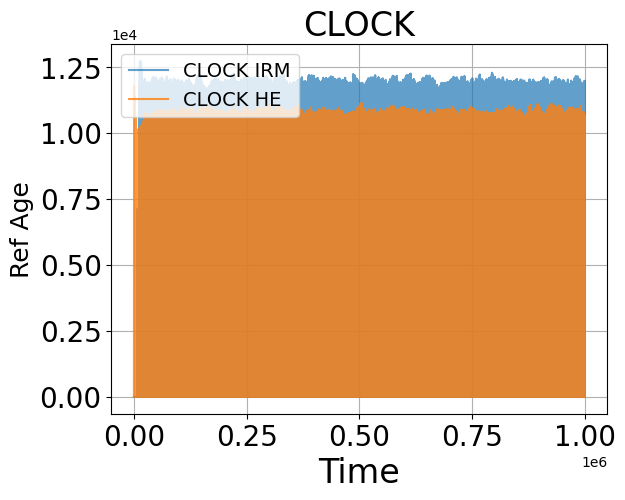

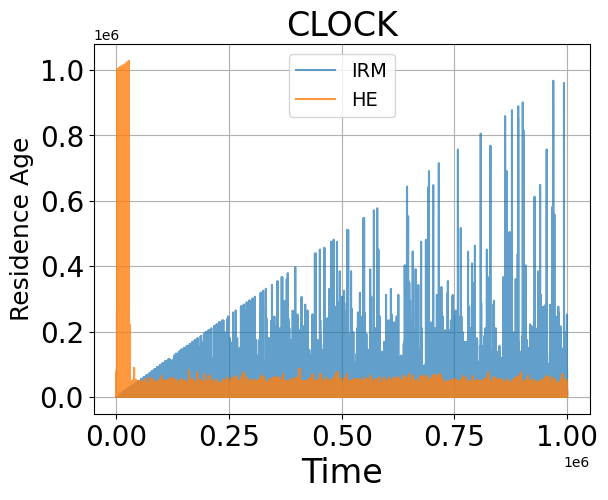

In [6]:
plt.plot(c_ref1, alpha=0.7, label='CLOCK IRM')
plt.plot(c_ref2, alpha=0.8, label='CLOCK HE')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(True)
ax.xaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(True) 
ax.yaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.tick_params(axis='both', labelsize=20)
plt.xlabel('Time', fontsize=24)
plt.ylabel('Ref Age', fontsize=18)
plt.legend(fontsize=14)
plt.title('CLOCK', fontsize=24)
plt.grid(True)
plt.show()

plt.plot(c_enter1, alpha=0.7, label='IRM')
plt.plot(c_enter2, alpha=0.8, label='HE')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(True) 
ax.xaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(True) 
ax.yaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.tick_params(axis='both', labelsize=20)
plt.xlabel('Time', fontsize=24)
plt.ylabel('Residence Age', fontsize=18)
plt.legend(fontsize=14)
plt.title('CLOCK', fontsize=24)
plt.grid(True)
plt.show()

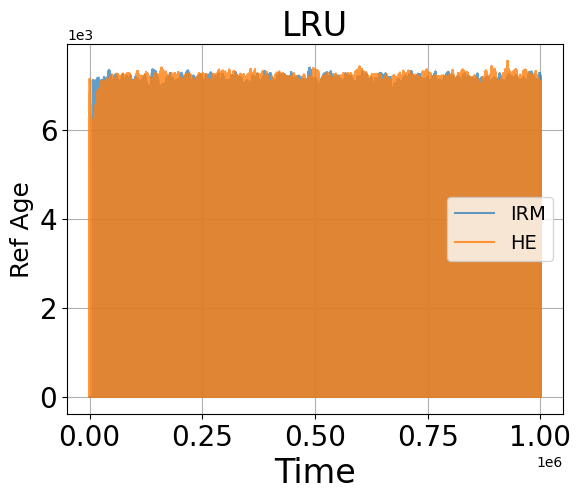

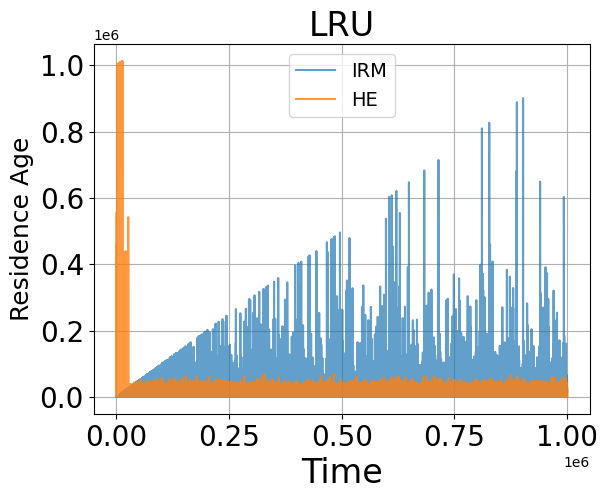

In [7]:
plt.plot(lru_ref1, alpha=0.7, label='IRM')
plt.plot(lru_ref2, alpha=0.8, label='HE')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(True)
ax.xaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(True) 
ax.yaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.tick_params(axis='both', labelsize=20)
plt.xlabel('Time', fontsize=24)
plt.ylabel('Ref Age', fontsize=18)
plt.legend(fontsize=14)
plt.title('LRU', fontsize=24)
plt.grid(True)
plt.show()

plt.plot(lru_enter1, alpha=0.7, label='IRM')
plt.plot(lru_enter2, alpha=0.8, label='HE')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(True)
ax.xaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(True)
ax.yaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.tick_params(axis='both', labelsize=20)
plt.xlabel('Time', fontsize=24)
plt.ylabel('Residence Age', fontsize=18)
plt.legend(fontsize=14)
plt.title('LRU', fontsize=24)
plt.grid(True)
plt.show()

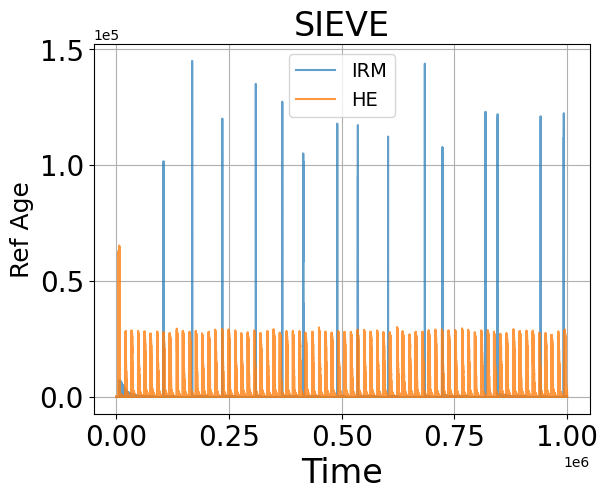

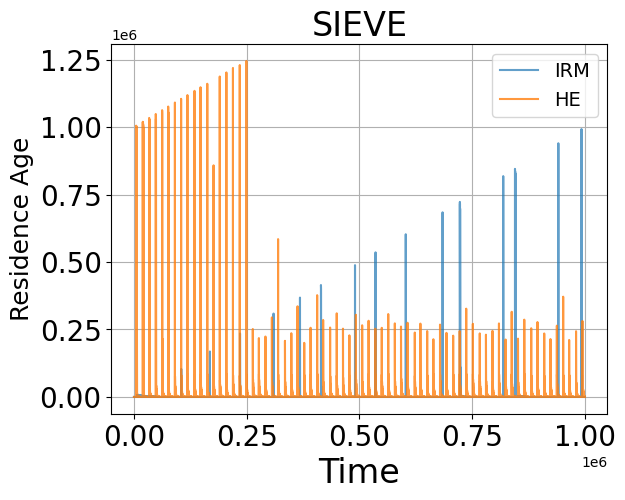

In [8]:
plt.plot(sieve_ref1, alpha=0.7, label='IRM')
plt.plot(sieve_ref2, alpha=0.8, label='HE')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(True)
ax.xaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(True)
ax.yaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.tick_params(axis='both', labelsize=20)
plt.xlabel('Time', fontsize=24)
plt.ylabel('Ref Age', fontsize=18)
plt.legend(fontsize=14)
plt.title('SIEVE', fontsize=24)
plt.grid(True)
plt.show()

plt.plot(sieve_enter1, alpha=0.7, label='IRM')
plt.plot(sieve_enter2, alpha=0.8, label='HE')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(True)
ax.xaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(True)
ax.yaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.tick_params(axis='both', labelsize=20)
plt.xlabel('Time', fontsize=24)
plt.ylabel('Residence Age', fontsize=18)
plt.legend(fontsize=14)
plt.title('SIEVE', fontsize=24)
plt.grid(True)
plt.show()